<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


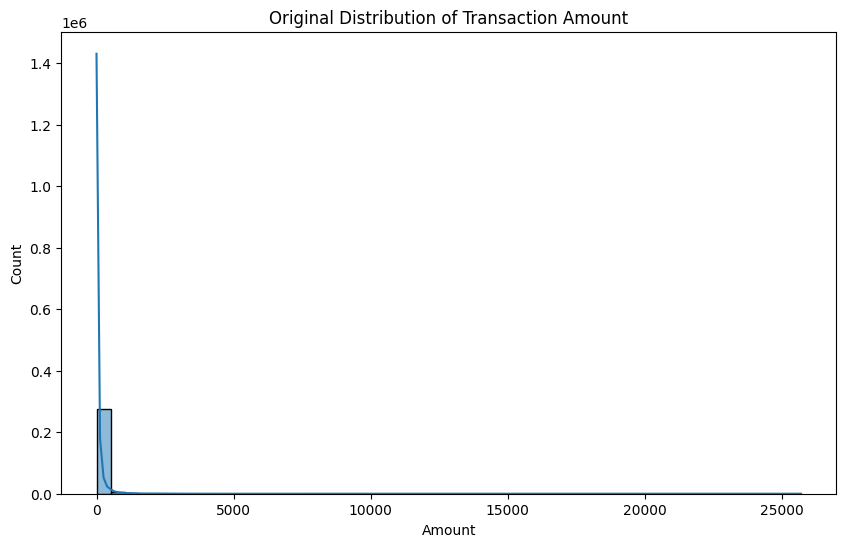

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


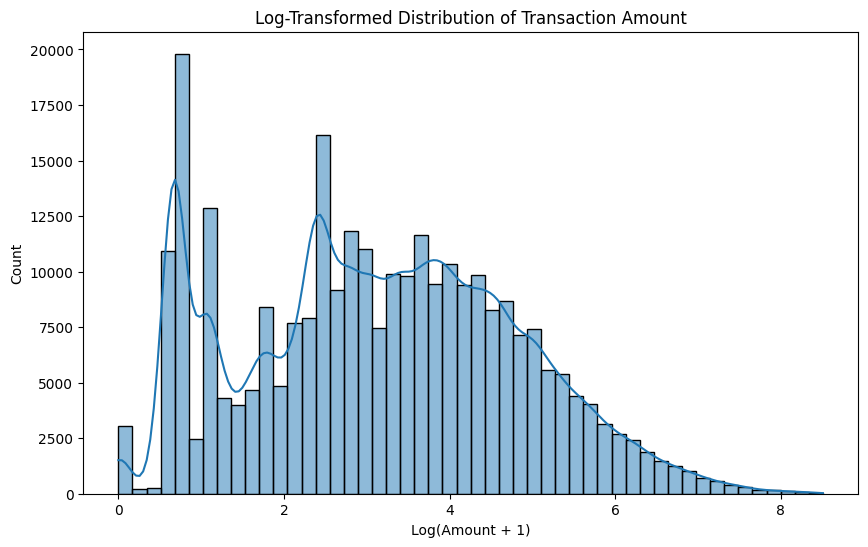

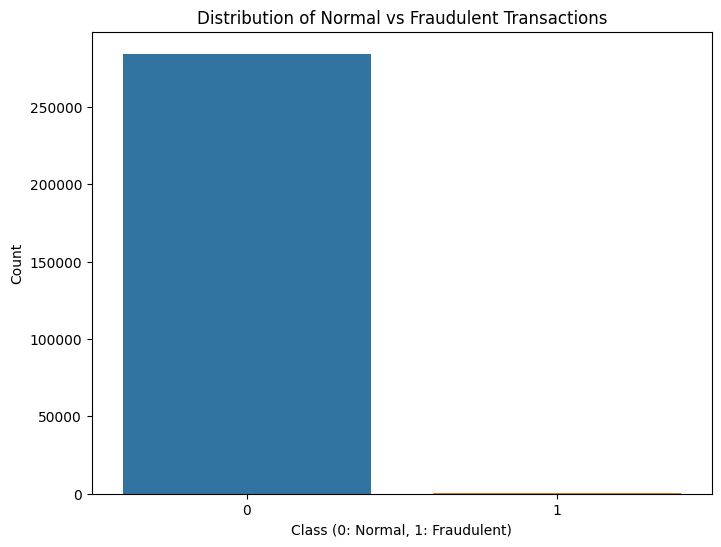

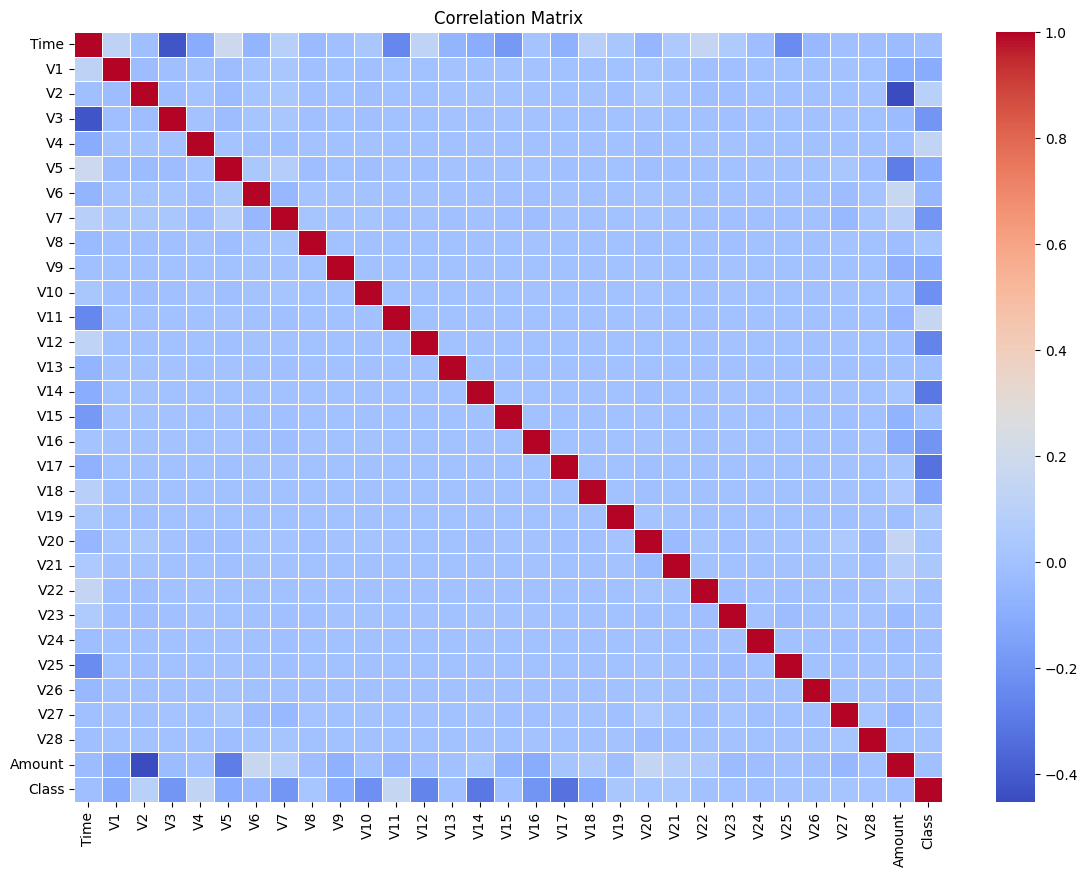

Feature correlations with Class:
Class        1.000000
V11          0.154920
V4           0.133767
V2           0.093133
V21          0.040663
V19          0.034803
V20          0.021226
V8           0.019895
Time_diff    0.018979
V27          0.017952
V28          0.009646
V26          0.004453
V25          0.003311
V22          0.000787
V23         -0.002832
V15         -0.004215
V13         -0.004562
V24         -0.007219
Amount      -0.008308
Time        -0.012324
V6          -0.044139
V9          -0.097783
V5          -0.098034
V1          -0.102098
V18         -0.111543
V3          -0.194310
V7          -0.195794
V16         -0.196820
V10         -0.217320
V12         -0.260712
V14         -0.302692
V17         -0.326568
Name: Class, dtype: float64

Training Logistic Regression...
Accuracy: 0.9463, AUC: 0.9900
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85192
           1       0.97      0.92      0

In [ ]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE

# 加载数据集
df = pd.read_csv('/kaggle/input/666666/creditcard.csv')

# 数据结构和缺失值检查
print(df.info())
print(df.isnull().sum())

# 数据可视化：原始交易金额分布
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Original Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

# 数据清洗和特征工程
# 限制交易金额在合理范围内并对金额进行对数变换
df = df[df['Amount'] < 5000]
df['Amount'] = np.log1p(df['Amount'])

# 对数变换后的交易金额分布
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of Transaction Amount')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Count')
plt.show()

# 类别分布可视化
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Normal vs Fraudulent Transactions')
plt.xlabel('Class (0: Normal, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

# 特征相关性分析
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 添加时间差特征
if 'Time' in df.columns:
    df['Time_diff'] = df['Time'].diff().fillna(0)

# 查看与目标列的相关性
corr = df.corr()['Class'].sort_values(ascending=False)
print("Feature correlations with Class:")
print(corr)

# 分离特征和目标变量
X = df.drop(['Class'], axis=1)
y = df['Class']

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Original Distribution of Normal vs Fraudulent Transactions')
plt.xlabel('Class (0: Normal, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

# 使用SMOTE处理类别不平衡
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 绘制SMOTE处理后的类别分布
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribution of Normal vs Fraudulent Transactions (After SMOTE)')
plt.xlabel('Class (0: Normal, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# 定义模型列表
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# 初始化结果存储
results = []

# 遍历每个模型，训练和评估
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)  # 训练模型
    y_pred = model.predict(X_test)  # 预测
    y_prob = model.predict_proba(X_test)[:, 1]  # 获取正类的概率

    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    results.append({"Model": model_name, "Accuracy": accuracy, "AUC": roc_auc})
    
    # 打印分类报告
    print(f"Accuracy: {accuracy:.4f}, AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# 汇总结果
results_df = pd.DataFrame(results).sort_values(by="AUC", ascending=False)
print("\nModel Performance Comparison:")
print(results_df)

# 绘制模型表现对比图
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="AUC", y="Model", palette="viridis")
plt.title("Model Performance Comparison (AUC)")
plt.xlabel("AUC")
plt.ylabel("Model")
plt.show()

# 获取最佳模型
best_model_name = results_df.iloc[0]['Model']
best_model_auc = results_df.iloc[0]['AUC']
print(f"\nBest Model: {best_model_name} with AUC: {best_model_auc:.4f}")

# 绘制最佳模型的ROC曲线和PR曲线
best_model = models[best_model_name]
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC曲线
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# PR曲线
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()
